<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>Привет Ильдар! Это Николай. Мне достался проект и на ревью, отлично.<br>
Так, как первую часть уже комментировал - сразу перейду ко второй).

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Здравствуй Ильдар!
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!

### Финальный проект "Промышленность: предсказание температуры стали"

<b>Описание проекта</b>



Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Нам предстоит построить модель, которая предскажет температуру стали.

<b>Описание этапа обработки</b>

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

<b>Описание данных</b>

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<b>План работы</b>

1. Предобработка и первичный анализ данных: изучение исходной информации, замена типа данных, обработка пропущенных значений, исследовательский анализ данных.


2. Подготовка датасета для обучения модели машинного обучения. Определение признаков и целевого признака, который мы будем предсказывать. Разделение датасета на тренировочную и тестовую(планирую использовать GridSearchCV).


3. Обучение моделей машинного обучения, планирую попробовать случайный лес, CatBoostRegressor, LightGBMRegressor и XGBoostRegressor.


4. Выбор лучшей модели и проверка её качества на тестовой выборке. Описание выводов.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ок, это хороший тон - дать описание проблематики.

## Подготовка данных

### Изучение исходной информации

In [15]:
#подключим необходимые для работы библиотеки

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st
from scipy.stats import kde

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

import shap
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
pd.options.display.float_format = '{:,.3f}'.format

#прочитаем исходные датафреймы(с рабочего компа)

try:
    
    data_arc = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_arc.csv', sep=',',\
        names=['key', 'start_heat', 'stop_heat', 'act_power', 'react_power'], header=0) 
    
    data_bulk = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_bulk.csv', sep=',') 
    
    data_bulk_time = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_bulk_time.csv', sep=',')
    
    data_gas = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_gas.csv', sep=',',\
        names=['key', 'gas'], header=0) 
    
    data_temp = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_temp.csv', sep=',',\
        names=['key', 'meas_time', 'temp'], header=0) 
    
    data_wire = pd.read_csv(
       'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_wire.csv', sep=',') 
    
    data_wire_time = pd.read_csv(
        'C:/Users/IshkulovIM/pythonworks/yandex_practikum/final_steel/data_wire_time.csv', sep=',') 
    
except:
    
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv', sep=',',\
        names=['key', 'start_heat', 'stop_heat', 'act_power', 'react_power'], header=0)
    
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv', sep=',')
    
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv', sep=',')
    
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv', sep=',',\
        names=['key', 'gas'], header=0)
    
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv', sep=',',\
        names=['meas_time', 'temp'], header=0)
    
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv', sep=',')
    
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv', sep=',')

In [17]:
#прочитаем исходные датафреймы(с домашнего компа)

try:
    
    data_arc = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_arc.csv', sep=',',\
        names=['key', 'start_heat', 'stop_heat', 'act_power', 'react_power'], header=0) 
        
        
    data_bulk = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_bulk.csv', sep=',') 
        
    data_bulk_time = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_bulk_time.csv', sep=',') 
        
    data_gas = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_gas.csv', sep=',',\
        names=['key', 'gas'], header=0) 
        
    data_temp = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_temp.csv', sep=',',\
        names=['key', 'meas_time', 'temp'], header=0) 
        
    data_wire = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_wire.csv', sep=',') 
        
    data_wire_time = pd.read_csv(
        'C:/Users/jnybfuvybtfgl kfolbl/mypythonworks/yandex/final_steel/data_wire_time.csv', sep=',') 
        
    
except:
    
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv', sep=',',\
        names=['key', 'start_heat', 'stop_heat', 'act_power', 'react_power'], header=0)
    
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv', sep=',')
    
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv', sep=',')
    
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv', sep=',',\
        names=['key', 'gas'], header=0)
    
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv', sep=',',\
        names=['key', 'meas_time', 'temp'], header=0)
    
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv', sep=',')
    
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv', sep=',')

In [18]:
#изучим основную информацию об исходных датафреймах

dataframes = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]
names = ['data_arc', 'data_bulk', 'data_bulk_time', 'data_gas', 'data_temp', 'data_wire', 'data_wire_time']

count = -1
for name in names:
    count += 1
    display(name)
    print('Первые 2 строки датафрейма:')
    display(dataframes[count].head(2))
    print('Основная информация о датафрейме:')
    display(dataframes[count].info())
    print('Доля пропущенных данных в датафрейме:')
    display(dataframes[count].isna().mean())
    print('Количество дубликатов:')
    display(dataframes[count].duplicated().sum())

'data_arc'

Первые 2 строки датафрейма:


,key,start_heat,stop_heat,act_power,react_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976,0.687
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.806,0.520


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          14876 non-null  int64  
 1   start_heat   14876 non-null  object 
 2   stop_heat    14876 non-null  object 
 3   act_power    14876 non-null  float64
 4   react_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

Доля пропущенных данных в датафрейме:


key           0.000
start_heat    0.000
stop_heat     0.000
act_power     0.000
react_power   0.000
dtype: float64

Количество дубликатов:


0

'data_bulk'

Первые 2 строки датафрейма:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.000,NaN,150.000,154.000
1,2,NaN,NaN,NaN,73.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.000,NaN,149.000,154.000


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Доля пропущенных данных в датафрейме:


key       0.000
Bulk 1    0.919
Bulk 2    0.993
Bulk 3    0.585
Bulk 4    0.676
Bulk 5    0.975
Bulk 6    0.816
Bulk 7    0.992
Bulk 8    1.000
Bulk 9    0.994
Bulk 10   0.944
Bulk 11   0.943
Bulk 12   0.217
Bulk 13   0.994
Bulk 14   0.103
Bulk 15   0.282
dtype: float64

Количество дубликатов:


0

'data_bulk_time'

Первые 2 строки датафрейма:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Доля пропущенных данных в датафрейме:


key       0.000
Bulk 1    0.919
Bulk 2    0.993
Bulk 3    0.585
Bulk 4    0.676
Bulk 5    0.975
Bulk 6    0.816
Bulk 7    0.992
Bulk 8    1.000
Bulk 9    0.994
Bulk 10   0.944
Bulk 11   0.943
Bulk 12   0.217
Bulk 13   0.994
Bulk 14   0.103
Bulk 15   0.282
dtype: float64

Количество дубликатов:


0

'data_gas'

Первые 2 строки датафрейма:


,key,gas
0,1,29.750
1,2,12.556


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Доля пропущенных данных в датафрейме:


key   0.000
gas   0.000
dtype: float64

Количество дубликатов:


0

'data_temp'

Первые 2 строки датафрейма:


,key,meas_time,temp
0,1,2019-05-03 11:16:18,"1,571.000"
1,1,2019-05-03 11:25:53,"1,604.000"


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        15907 non-null  int64  
 1   meas_time  15907 non-null  object 
 2   temp       13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

Доля пропущенных данных в датафрейме:


key         0.000
meas_time   0.000
temp        0.182
dtype: float64

Количество дубликатов:


0

'data_wire'

Первые 2 строки датафрейма:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

Доля пропущенных данных в датафрейме:


key      0.000
Wire 1   0.008
Wire 2   0.650
Wire 3   0.980
Wire 4   0.995
Wire 5   1.000
Wire 6   0.976
Wire 7   0.996
Wire 8   0.994
Wire 9   0.991
dtype: float64

Количество дубликатов:


0

'data_wire_time'

Первые 2 строки датафрейма:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Доля пропущенных данных в датафрейме:


key      0.000
Wire 1   0.008
Wire 2   0.650
Wire 3   0.980
Wire 4   0.995
Wire 5   1.000
Wire 6   0.976
Wire 7   0.996
Wire 8   0.994
Wire 9   0.991
dtype: float64

Количество дубликатов:


0

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Внимательно изучим исходную информацию по каждому датафрейму.
    
1. "data_arc" — содержит данные об электродах.
В данном датафрейме информация представлена в полном виде. Дубликаты отсутствуют. Также необходимо заменить тип данных у временных признаков.
    
2. "data_bulk" — содержит данные об объеме подачи сыпучих материалов. В данном датафрейме отсутствует большая часть исходной информации. Связано это с осуществлением технологического процесса. Не каждый сыпучий материал применяется на всех стадиях, некоторые применяются очень редко. Типы даннных указаны корректно.
    
3. "data_bulk_time" — содержит данные о времени подачи сыпучих материалов. В данном датафрейме отсутствует большая часть исходной информации как и в датафрейме "data_bulk". Связано это с осуществлением технологического процесса. Не каждый сыпучий материал применяется на всех стадиях, некоторые применяются очень редко. Тип даннных в столбцах с указанием времени некорректный, необходимо заменить.
    
4. "data_gas" — содержит информацию о подаче газа. Тип данных указан корректно. Данные представлены в полном объеме.
    
5. "data_temp" — содержит результаты замеров температуры. Данные представлены не в полном объеме ввиду того, что на некоторых итерациях замеры производились несколько раз и не всегда был получен результат замера, либо он был получен и не учтен ввиду потери информации на этапе передачи от датчика к базе данных. Тип данных в столбце с временем замера некорректный, надо будет заменить.
    
6. "data_wire" — содержит данные об объеме подачи проволочных материалов. В данном датафрейме отсутствует большая часть исходной информации. Связано это с осуществлением технологического процесса. Не каждый проволочный материал применяется на всех стадиях, некоторые применяются очень редко. Типы даннных указаны корректно.    
    
7. "data_wire_time" — содержит данные о времени подачи проволочных материалов. В данном датафрейме отсутствует большая часть исходной информации как и в датафрейме "data_wire". Связано это с осуществлением технологического процесса. Не каждый проволочный материал применяется на всех стадиях, некоторые применяются очень редко. Тип даннных в столбцах с указанием времени некорректный, необходимо заменить.
    
Во всех датафреймах можно заметить, что количество итераций одинаково, в дальнейшем можно будет использовать данный факт для общей индексации данных.  

</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
супер! это важно, что есть выводы по анализу.

### Замена типа данных

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
Произведем замену типа данных по столбцам со временем замера либо подачи материала во всех датафреймах на временной тип данных.
</div>

In [19]:
#произведем замену в датафрейме 'data_arc'
for i in data_arc.columns[1:3]:
    data_arc[i] =  pd.to_datetime(data_arc[i])
    
#произведем замену в датафрейме 'data_bulk_time' 
for i in data_bulk_time.columns[1:]:
    data_bulk_time[i] =  pd.to_datetime(data_bulk_time[i])

#произведем замену в датафрейме 'data_temp'
data_temp['meas_time'] = pd.to_datetime(data_temp['meas_time'])

#произведем замену в датафрейме 'data_bulk_time' 
for i in data_wire_time.columns[1:]:
    data_wire_time[i] =  pd.to_datetime(data_wire_time[i])

## Анализ данных

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
Более подробно изучим описательную статитстику по датафреймам, а также построим графики распределения величин.
</div>

In [5]:
#начнем с данных о электродах

print(f'Описательная статистика по датафрейму "data_arc":')
data_arc.describe()

Описательная статистика по датафрейму "data_arc":


,key,act_power,react_power
count,"14,876.000","14,876.000","14,876.000"
mean,"1,615.220",0.670,0.453
std,934.572,0.408,5.879
min,1.000,0.030,-715.505
25%,806.000,0.395,0.291
50%,"1,617.000",0.556,0.416
75%,"2,429.000",0.857,0.637
max,"3,241.000",3.732,2.676


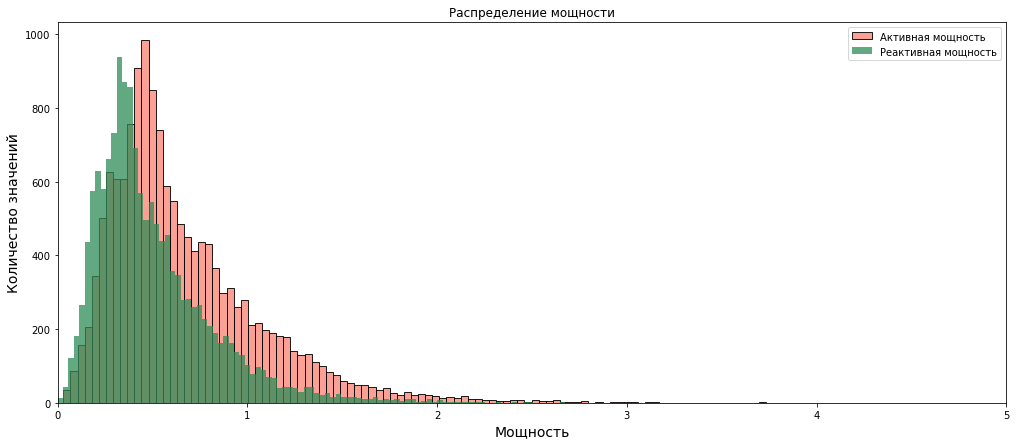

In [6]:
#строим график распределения

fig, ax = plt.subplots(figsize=(17,7))

sns.histplot(data = data_arc, x="act_power", color='salmon', label='Активная мощность')
sns.histplot(data = data_arc, x="react_power", color='seagreen', label='Реактивная мощность')


ax.set_xlabel("Мощность", fontsize=14)
ax.set_ylabel("Количество значений", fontsize=14)

plt.legend(loc='upper right')
ax.set_xlim(left=0, right=5)
plt.title(f'Распределение мощности')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
По распределениям мощностей можно заметить, что данные выборки имеют позитивную скошенность. Также необходимо отметить выброс по показателю реактивной мощности со значением "-715.505". 
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Хоть реактивная и может принимать отицательные значения, но в данном случае это единичный. Поэтому точно надо исключать его. Ок,  одна строка - не критично в данном проекте.. Хотя, если это строка последняя по партии, то лучше удалить всю партию. Т.к. последяя строка - целевая будет.. и мы подставим потом не последнюю температуру по пратии, получается..

In [7]:
#рассмотрим данные об объеме подачи сыпучих материалов

print(f'Описательная статистика по датафрейму "data_bulk":')
data_bulk.describe()

Описательная статистика по датафрейму "data_bulk":


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,"3,129.000",252.000,22.000,"1,298.000","1,014.000",77.000,576.000,25.000,1.000,19.000,176.000,177.000,"2,450.000",18.000,"2,806.000","2,248.000"
mean,"1,624.384",39.242,253.045,113.879,104.394,107.026,118.925,305.600,49.000,76.316,83.284,76.819,260.471,181.111,170.285,160.513
std,933.338,18.278,21.181,75.483,48.184,81.791,72.058,191.023,nan,21.721,26.060,59.655,120.649,46.088,65.869,51.765
min,1.000,10.000,228.000,6.000,12.000,11.000,17.000,47.000,49.000,63.000,24.000,8.000,53.000,151.000,16.000,1.000
25%,816.000,27.000,242.000,58.000,72.000,70.000,69.750,155.000,49.000,66.000,64.000,25.000,204.000,153.250,119.000,105.000
50%,"1,622.000",31.000,251.500,97.500,102.000,86.000,100.000,298.000,49.000,68.000,86.500,64.000,208.000,155.500,151.000,160.000
75%,"2,431.000",46.000,257.750,152.000,133.000,132.000,157.000,406.000,49.000,70.500,102.000,106.000,316.000,203.500,205.750,205.000
max,"3,241.000",185.000,325.000,454.000,281.000,603.000,503.000,772.000,49.000,147.000,159.000,313.000,"1,849.000",305.000,636.000,405.000


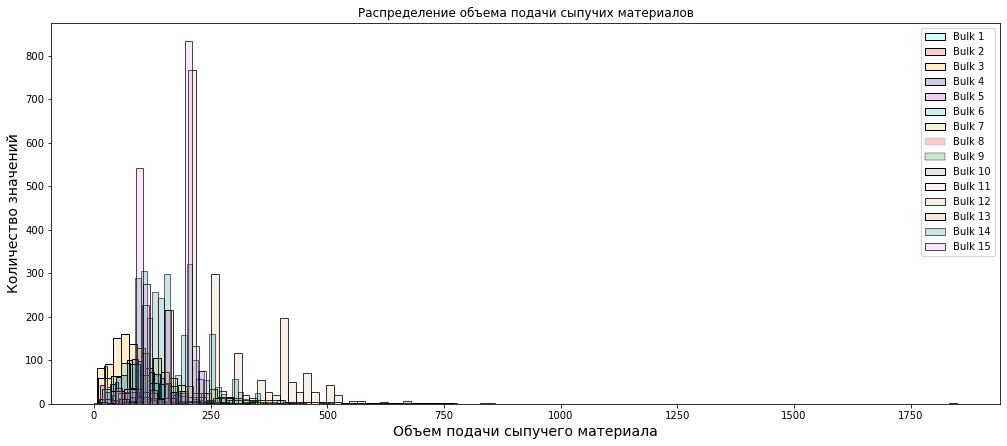

In [8]:
fig, ax = plt.subplots(figsize=(17,7))

colors = ['cyan', 'red', 'orange', 'navy', 'm', 'c', 'y', 'r', 'g', 'slategrey', 'pink', 'tan', 'coral', 'teal', 'violet']


for i, g in enumerate(data_bulk.columns[1:]):
    
    color = colors[i]
    
    sns.histplot(data = data_bulk, x=g, label=g, alpha=0.2, color = color)
    
ax.set_xlabel("Объем подачи сыпучего материала", fontsize=14)
ax.set_ylabel("Количество значений", fontsize=14)

plt.legend(loc='upper right')
#ax.set_xlim(left=0, right=5)
plt.title(f'Распределение объема подачи сыпучих материалов')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
По распределениям объема сыпучих материалов можно заметить следующее: наиболее часто применяемые материалы: Bulk 12, Bulk 14 и Bulk 15. 
    <br> 
А вот по объему картина немного иная, тут лидируют следующие сыпучие материалы: Bulk 7, Bulk 2 и Bulk 12. Также по материалу Bulk 12 есть аномально большое значение по объему: 1849.
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>
    
В самой теории выбросов принято считать, что выбросы в интервале от q_3 + 1.5*irq до q_3 + з*irq - на усмотрение бизнеса. А вот всё, что больше q_3 + 3*irq - уже точно надо работать - на удаление!!!<br>
q_3 - верхняя квартиль<br>
irq - интерквартильный размах

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим.

In [9]:
#далее изучим информацию о подаче газа

print(f'Описательная статистика по датафрейму "data_gas":')
data_gas.describe()

Описательная статистика по датафрейму "data_gas":


,key,gas
count,"3,239.000","3,239.000"
mean,"1,621.861",11.002
std,935.386,6.220
min,1.000,0.008
25%,812.500,7.043
50%,"1,622.000",9.836
75%,"2,431.500",13.770
max,"3,241.000",77.995


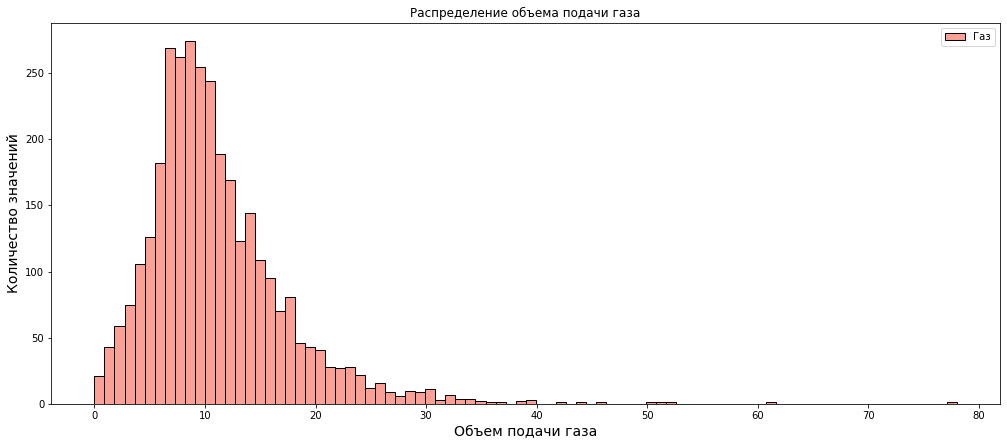

In [10]:
#строим график распределения

fig, ax = plt.subplots(figsize=(17,7))

sns.histplot(data = data_gas, x="gas", color='salmon', label='Газ')


ax.set_xlabel("Объем подачи газа", fontsize=14)
ax.set_ylabel("Количество значений", fontsize=14)

plt.legend(loc='upper right')

plt.title(f'Распределение объема подачи газа')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
По распределенияю объема подачи газа можно сказать следюущее: распределение имеет положительную скошенность. Распределение имеет форму нормального распределения.

In [11]:
#далее изучим информацию с замерами температуры

print(f'Описательная статистика по датафрейму "data_temp":')
data_temp.describe()

Описательная статистика по датафрейму "data_temp":


,key,temp
count,"15,907.000","13,006.000"
mean,"1,607.881","1,591.841"
std,942.212,21.376
min,1.000,"1,191.000"
25%,790.000,"1,581.000"
50%,"1,618.000","1,591.000"
75%,"2,427.000","1,601.000"
max,"3,241.000","1,705.000"


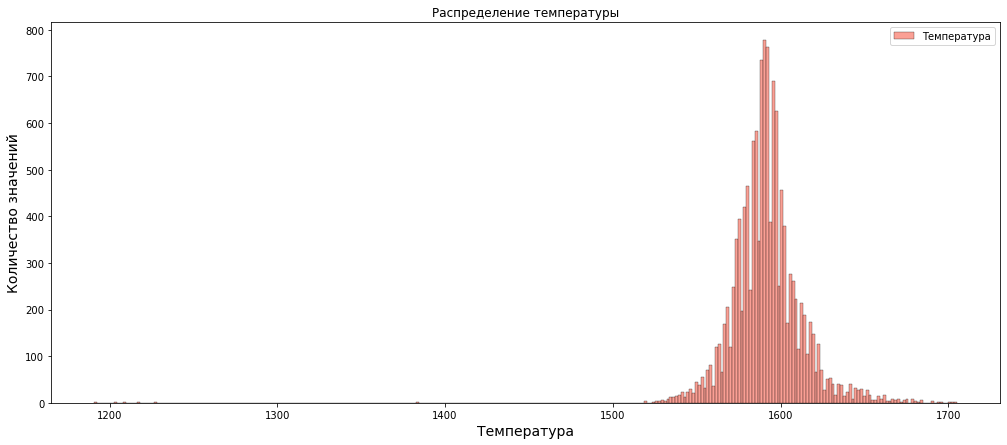

In [12]:
#строим график распределения

fig, ax = plt.subplots(figsize=(17,7))

sns.histplot(data = data_temp, x="temp", color='salmon', label='Температура')


ax.set_xlabel("Температура", fontsize=14)
ax.set_ylabel("Количество значений", fontsize=14)

plt.legend(loc='upper right')

plt.title(f'Распределение температуры')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
Анализируя распределение температуры можно сказать, что данное распределение имеет форму нормального распределения. Также отмечаются замеры-выбросы в районе 1200 и 1400 градусов. В дальнейшем эти выбросы предстоит обработать.

In [13]:
#далее изучим информацию о проволочных материалах

print(f'Описательная статистика по датафрейму "data_wire":')
data_wire.describe()

Описательная статистика по датафрейму "data_wire":


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,"3,081.000","3,055.000","1,079.000",63.000,14.000,1.000,73.000,11.000,19.000,29.000
mean,"1,623.426",100.896,50.577,189.483,57.443,15.132,48.017,10.039,53.625,34.156
std,932.997,42.013,39.320,99.513,28.825,nan,33.920,8.611,16.882,19.932
min,1.000,1.919,0.030,0.144,24.149,15.132,0.034,0.234,45.077,4.623
25%,823.000,72.116,20.194,95.135,40.807,15.132,25.054,6.763,46.095,22.058
50%,"1,619.000",100.158,40.143,235.195,45.234,15.132,42.076,9.017,46.280,30.066
75%,"2,434.000",126.060,70.228,276.252,76.125,15.132,64.213,11.886,48.090,43.862
max,"3,241.000",330.314,282.780,385.009,113.231,15.132,180.455,32.848,102.762,90.054


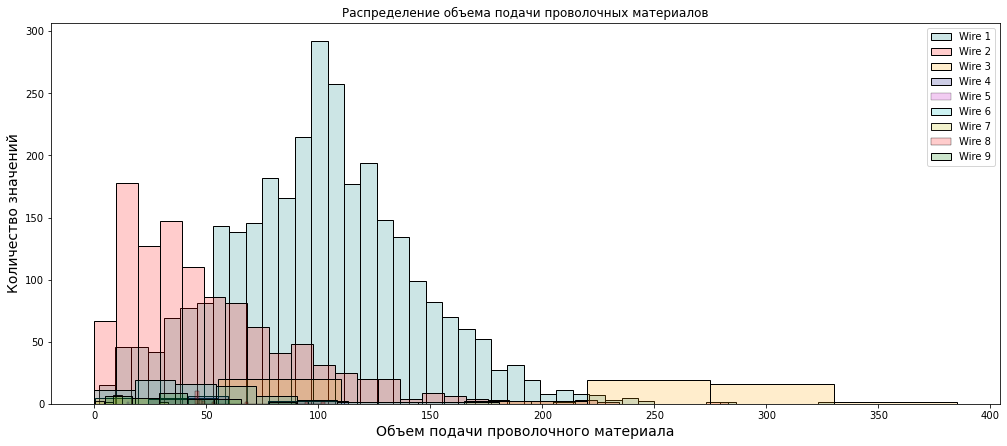

In [14]:
fig, ax = plt.subplots(figsize=(17,7))

colors = ['teal', 'red', 'orange', 'navy', 'm', 'c', 'y', 'r', 'g']


for i, g in enumerate(data_wire.columns[1:]):
    
    color = colors[i]
    
    sns.histplot(data = data_wire, x=g, label=g, alpha=0.2, color = color)
    

ax.set_xlabel("Объем подачи проволочного материала", fontsize=14)
ax.set_ylabel("Количество значений", fontsize=14)

plt.legend(loc='upper right')
#ax.set_xlim(left=0, right=5)
plt.title(f'Распределение объема подачи проволочных материалов')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
По распределениям объема подачи проволочных можно заметить следующее: наиболее часто применяемые материалы: Wire 1 и Wire 2.
    <br> 
А вот по объему картина немного иная, тут лидируют следующие проволочные материалы:  Wire 3 и Wire 1.
</div>

### Вывод

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
Резюмируя, можно сказать следующее: 
    
- По распределениям мощностей можно заметить, что данные выборки имеют позитивную скошенность. Также необходимо отметить выброс по показателю реактивной мощности со значением "-715.505".   
    
-  По распределениям объема сыпучих материалов можно заметить следующее: наиболее часто применяемые материалы: Bulk 12, Bulk 14 и Bulk 15. А вот по объему картина немного иная, тут лидируют следующие сыпучие материалы: Bulk 7, Bulk 2 и Bulk 12. Также по материалу Bulk 12 есть аномально большое значение по объему: 1849.
    
- По распределенияю объема подачи газа можно сказать следюущее: распределение имеет положительную скошенность. Распределение имеет форму нормального распределения.
    
- Анализируя распределение температуры можно сказать, что данное распределение имеет форму нормального распределения. Также отмечаются замеры-выбросы в районе 1200 и 1400 градусов. В дальнейшем эти выбросы предстоит обработать.

- По распределениям объема подачи проволочных можно заметить следующее: наиболее часто применяемые материалы: Wire 1 и Wire 2. А вот по объему картина немного иная, тут лидируют следующие проволочные материалы: Wire 3 и Wire 1.

- В целом можно заметить, что не в каждой партии применялся тот или иной проволочный или сыпучий материал. Также замеры температуры производились в некоторых партиях больше раз, чем в других.
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Ильдар, с первичным анализом - всё как надо получилось: и аналитика и графика (её можно больше)).<br>
И выводы логичные. Замечу только, что при удалении пустот в целевой - удалять лучше всю партию.<br>
    
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).<br>
Что ж, тогда вперёд к моделированию)<br>
Доп.вопросов, кроме слаковских не увидел, ОК. Если возникнут всё же - всегда в слаке сможем встретиться.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>ОК, изучаю дальше.

In [20]:
data_temp

,key,meas_time,temp
0,1,2019-05-03 11:16:18,"1,571.000"
1,1,2019-05-03 11:25:53,"1,604.000"
2,1,2019-05-03 11:29:11,"1,618.000"
3,1,2019-05-03 11:30:01,"1,601.000"
4,1,2019-05-03 11:30:39,"1,613.000"
...,...,...,...
15902,3241,2019-09-01 04:03:30,"1,586.000"
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


# Этап моделирования

### Подготовка данных перед обучением модели

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br>
В данном разделе необходимо проделать следующие шаги:
     <br>
- удалить пропуски в таблице с замерами температуры, а также удалить партии, в которых был только один замер температуры;
      <br>
- определить энергию для каждой партии через мощность: определить полную мощность как корень суммы квадратов активной и реактивной мощностей, затем умножить на время работы дуги;
      <br>
- объединить необходимые таблицы в одну для дальнейшей работы;
     <br>
- проверить признаки на коллинеарность.
</div>

In [21]:
#удалим предположительные выбросы из датафрейма с замерами температуры

data_temp = data_temp.query('temp > 1300')

data_temp

,key,meas_time,temp
0,1,2019-05-03 11:16:18,"1,571.000"
1,1,2019-05-03 11:25:53,"1,604.000"
2,1,2019-05-03 11:29:11,"1,618.000"
3,1,2019-05-03 11:30:01,"1,601.000"
4,1,2019-05-03 11:30:39,"1,613.000"
...,...,...,...
15878,3237,2019-08-31 22:44:04,"1,569.000"
15883,3238,2019-08-31 23:30:31,"1,584.000"
15886,3239,2019-09-01 01:31:47,"1,598.000"
15894,3240,2019-09-01 02:39:01,"1,617.000"


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>понял.

In [22]:
#определим количество замеров температуры по каждой партии

data_temp_count = data_temp.groupby('key').agg({'temp':'count'}).sort_values(by='temp', ascending=False)

data_temp_count

,temp
key,
46,16
1513,16
44,16
2108,15
1214,15
...,...
2748,1
2749,1
2750,1


In [23]:
#удалим партии, в которых был всего один замер температуры

data_temp_count = data_temp_count.query('temp > 1')

data_temp_count = data_temp_count.rename(columns={'temp':'count_temp'})

data_temp_count

,count_temp
key,
46,16
1513,16
44,16
2108,15
1214,15
...,...
958,2
2254,2
2245,2


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>да, это важно!

In [24]:
#заменим пропущенные значения в замерах температуры на нули

data_temp = data_temp.fillna(0)

In [25]:
data_temp.tail(10)

,key,meas_time,temp
15857,3232,2019-08-31 19:55:53,"1,563.000"
15862,3233,2019-08-31 20:24:14,"1,597.000"
15866,3234,2019-08-31 20:54:17,"1,614.000"
15869,3235,2019-08-31 21:31:47,"1,590.000"
15874,3236,2019-08-31 22:08:13,"1,607.000"
15878,3237,2019-08-31 22:44:04,"1,569.000"
15883,3238,2019-08-31 23:30:31,"1,584.000"
15886,3239,2019-09-01 01:31:47,"1,598.000"
15894,3240,2019-09-01 02:39:01,"1,617.000"
15902,3241,2019-09-01 04:03:30,"1,586.000"


In [26]:
#определим последние значения замеров температуры в каждой партии

data_temp_without_na = data_temp.groupby('key').agg({'temp':'last'})

data_temp_without_na

,temp
key,
1,"1,613.000"
2,"1,602.000"
3,"1,599.000"
4,"1,625.000"
5,"1,602.000"
...,...
3237,"1,569.000"
3238,"1,584.000"
3239,"1,598.000"


In [27]:
#удалим партии, в которых целевая переменная ноль

data_temp_without_na = data_temp_without_na.query('temp != 0')

data_temp_without_na = data_temp_without_na.rename(columns={'temp':'last_temp'})

data_temp_without_na

,last_temp
key,
1,"1,613.000"
2,"1,602.000"
3,"1,599.000"
4,"1,625.000"
5,"1,602.000"
...,...
3237,"1,569.000"
3238,"1,584.000"
3239,"1,598.000"


In [28]:
#теперь определим партии, в которых было более одного замера температуры и присутствует последнее значение замера

data_norm_part = data_temp_without_na.merge(data_temp_count, on='key')

data_norm_part

,last_temp,count_temp
key,,
1,"1,613.000",5
2,"1,602.000",6
3,"1,599.000",5
4,"1,625.000",3
5,"1,602.000",2
...,...,...
2495,"1,591.000",3
2496,"1,591.000",4
2497,"1,589.000",2


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>таааак, хорошо.

In [29]:
#объединим таблицы с партиями с начальными данными по измерениям температуры

data_norm_part_temp = data_temp.merge(data_norm_part, on='key')

data_norm_part_temp

,key,meas_time,temp,last_temp,count_temp
0,1,2019-05-03 11:16:18,"1,571.000","1,613.000",5
1,1,2019-05-03 11:25:53,"1,604.000","1,613.000",5
2,1,2019-05-03 11:29:11,"1,618.000","1,613.000",5
3,1,2019-05-03 11:30:01,"1,601.000","1,613.000",5
4,1,2019-05-03 11:30:39,"1,613.000","1,613.000",5
...,...,...,...,...,...
12256,2498,2019-08-06 02:19:26,"1,593.000","1,594.000",5
12257,2498,2019-08-06 02:25:31,"1,594.000","1,594.000",5
12258,2499,2019-08-06 02:40:25,"1,569.000","1,603.000",3
12259,2499,2019-08-06 02:54:24,"1,604.000","1,603.000",3


In [30]:
#теперь, когда мы отбросили партии с одним замером, определим как признак начальную измеренную температуру партии

data_temp_first = data_norm_part_temp.groupby('key').agg({'temp':'first'})

data_temp_first = data_temp_first.rename(columns={'temp':'first_temp'})

data_temp_first

,first_temp
key,
1,"1,571.000"
2,"1,581.000"
3,"1,596.000"
4,"1,601.000"
5,"1,576.000"
...,...
2495,"1,570.000"
2496,"1,554.000"
2497,"1,571.000"


In [31]:
#добавим полученный признак к таблице "data_norm_part"

data_norm_part = data_norm_part.merge(data_temp_first, on='key')

data_norm_part

,last_temp,count_temp,first_temp
key,,,
1,"1,613.000",5,"1,571.000"
2,"1,602.000",6,"1,581.000"
3,"1,599.000",5,"1,596.000"
4,"1,625.000",3,"1,601.000"
5,"1,602.000",2,"1,576.000"
...,...,...,...
2495,"1,591.000",3,"1,570.000"
2496,"1,591.000",4,"1,554.000"
2497,"1,589.000",2,"1,571.000"


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>принято.

In [32]:
#перейдем к удалению партии с отрицательной реактивной мощностью

data_arc_group = data_arc.groupby('key').agg({'react_power':'min'})

data_arc_group = data_arc_group.query('react_power > 0')

data_arc_group

,react_power
key,
1,0.414
2,0.283
3,0.156
4,0.268
5,0.182
...,...
3237,0.320
3238,0.310
3239,0.135


In [33]:
#объединим таблицы для дальнейшей работы

data_arc_new = data_arc.merge(data_arc_group, on='key')

data_arc_new

,key,start_heat,stop_heat,act_power,react_power_x,react_power_y
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976,0.687,0.414
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.806,0.520,0.414
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744,0.499,0.414
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659,1.063,0.414
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.693,0.414,0.414
...,...,...,...,...,...,...
14867,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.534,0.354,0.146
14868,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.677,0.524,0.146
14869,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.734,0.476,0.146
14870,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.221,0.146,0.146


In [34]:
#далее необходимо рассчитать энергию через мощность, для начала рассчитаем полную мощность и время работы дуги

data_arc_new['full_power'] = (data_arc_new.act_power**2 + data_arc_new.react_power_x**2)**0.5

data_arc_new['delta_time'] = data_arc_new.stop_heat - data_arc_new.start_heat

data_arc_new['delta_time_sec'] = pd.to_timedelta(data_arc_new['delta_time']).dt.total_seconds().astype(int)

data_arc_new['energy'] = data_arc_new.full_power*data_arc_new.delta_time_sec

data_arc_new

,key,start_heat,stop_heat,act_power,react_power_x,react_power_y,full_power,delta_time,delta_time_sec,energy
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976,0.687,0.414,1.194,0 days 00:03:48,228,272.150
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.806,0.520,0.414,0.959,0 days 00:03:05,185,177.417
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744,0.499,0.414,0.896,0 days 00:02:52,172,154.119
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659,1.063,0.414,1.970,0 days 00:06:05,365,719.221
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.693,0.414,0.414,0.807,0 days 00:02:28,148,119.471
...,...,...,...,...,...,...,...,...,...,...
14867,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.534,0.354,0.146,0.641,0 days 00:02:37,157,100.582
14868,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.677,0.524,0.146,0.856,0 days 00:03:00,180,154.001
14869,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.734,0.476,0.146,0.875,0 days 00:03:04,184,160.919
14870,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.221,0.146,0.146,0.264,0 days 00:00:57,57,15.076


In [35]:
#рассчитаем суммарную работу по партиям

data_arc_sum_energy = data_arc_new.groupby('key').agg({'energy':'sum'})

data_arc_sum_energy

,energy
key,
1,"1,442.378"
2,881.234
3,525.067
4,796.911
5,"1,199.138"
...,...
3237,958.336
3238,555.867
3239,"1,013.068"


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>понял с этим.

In [36]:
#перейдем к объединеню датасетов для формирования общей таблицы признаков

data_steel_full = data_norm_part.merge(data_arc_sum_energy, on='key').merge(data_bulk, on='key').\
                                                merge(data_wire, on='key').merge(data_gas, on='key')

data_steel_full = data_steel_full.fillna(0)

data_steel_full = data_steel_full.drop(['count_temp', 'Wire 5'], axis=1)

data_steel_full

,key,last_temp,first_temp,energy,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9,gas
0,1,"1,613.000","1,571.000","1,442.378",0.000,0.000,0.000,43.000,0.000,0.000,...,154.000,60.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,29.750
1,2,"1,602.000","1,581.000",881.234,0.000,0.000,0.000,73.000,0.000,0.000,...,154.000,96.052,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.556
2,3,"1,599.000","1,596.000",525.067,0.000,0.000,0.000,34.000,0.000,0.000,...,153.000,91.160,0.000,0.000,0.000,0.000,0.000,0.000,0.000,28.555
3,4,"1,625.000","1,601.000",796.911,0.000,0.000,0.000,81.000,0.000,0.000,...,154.000,89.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.841
4,5,"1,602.000","1,576.000","1,199.138",0.000,0.000,0.000,78.000,0.000,0.000,...,152.000,89.238,9.115,0.000,0.000,0.000,0.000,0.000,0.000,5.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2495,"1,591.000","1,570.000",778.818,0.000,0.000,21.000,0.000,0.000,0.000,...,223.000,89.151,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.126
2324,2496,"1,591.000","1,554.000",875.261,0.000,0.000,0.000,63.000,0.000,0.000,...,226.000,114.180,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.413
2325,2497,"1,589.000","1,571.000",556.930,0.000,0.000,0.000,85.000,0.000,0.000,...,226.000,94.087,9.048,0.000,0.000,0.000,0.000,0.000,0.000,6.272
2326,2498,"1,594.000","1,591.000",767.818,0.000,0.000,90.000,0.000,0.000,0.000,...,207.000,118.111,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.954


In [37]:
data_steel_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2327
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2328 non-null   int64  
 1   last_temp   2328 non-null   float64
 2   first_temp  2328 non-null   float64
 3   energy      2328 non-null   float64
 4   Bulk 1      2328 non-null   float64
 5   Bulk 2      2328 non-null   float64
 6   Bulk 3      2328 non-null   float64
 7   Bulk 4      2328 non-null   float64
 8   Bulk 5      2328 non-null   float64
 9   Bulk 6      2328 non-null   float64
 10  Bulk 7      2328 non-null   float64
 11  Bulk 8      2328 non-null   float64
 12  Bulk 9      2328 non-null   float64
 13  Bulk 10     2328 non-null   float64
 14  Bulk 11     2328 non-null   float64
 15  Bulk 12     2328 non-null   float64
 16  Bulk 13     2328 non-null   float64
 17  Bulk 14     2328 non-null   float64
 18  Bulk 15     2328 non-null   float64
 19  Wire 1      2328 non-null  

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>есть контаткт)

<AxesSubplot:>

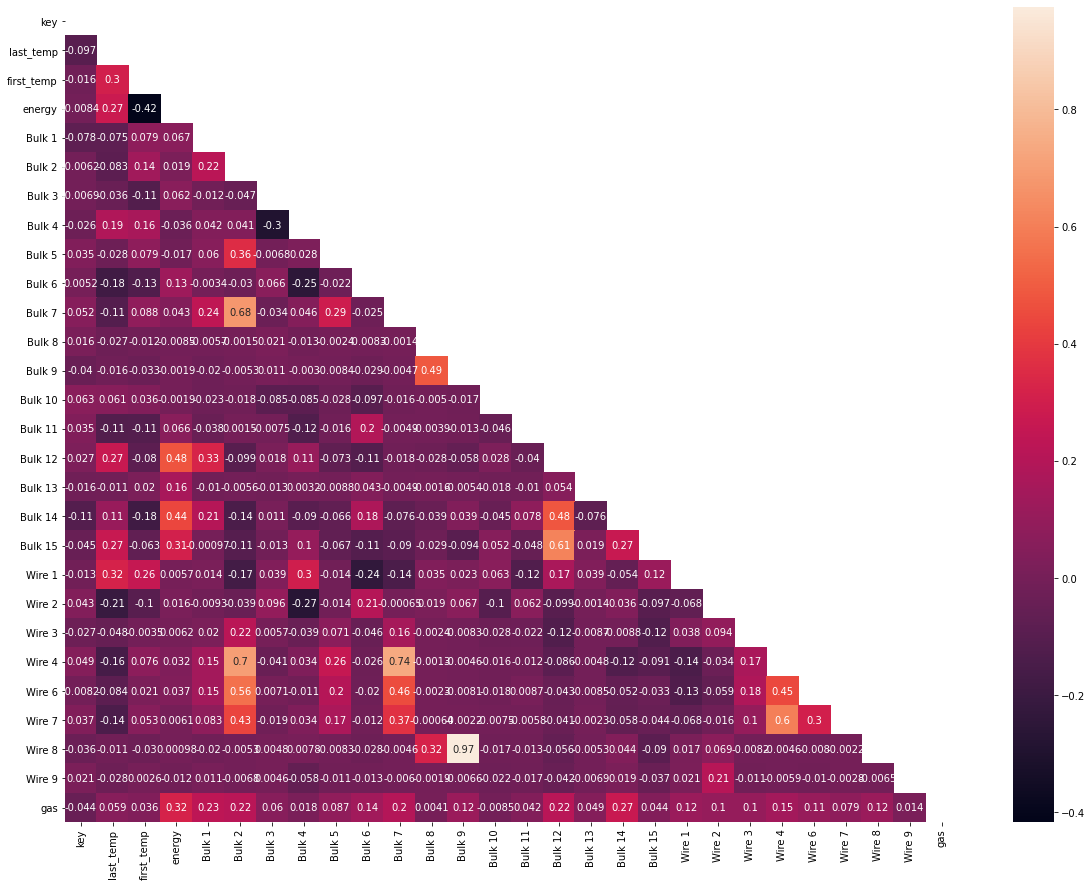

In [38]:
#произведем проверку на мультиколлинеарность признаков

fig, ax = plt.subplots(figsize=(20,15))

matrix = np.triu(data_steel_full.corr())
sns.heatmap(data_steel_full.corr(), annot=True, mask=matrix)

<div class="alert alert-info">
<b>Комментарий студента:</b>
По тепловой карте проверки признаков на коллинеарность можно заметить, что существует практически линейная зависимость между признаками "Wire 8" и "Bulk 9". Для адекватного построения моделей машинного обучения удалим признак "Wire 8", т.к. его ненулевых значчений меньше в датафрейме.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>ок, понятно.

In [39]:
data_steel_full = data_steel_full.drop(['Wire 8'], axis=1).set_index('key')

In [40]:
data_steel_full

,last_temp,first_temp,energy,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,...,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9,gas
key,,,,,,,,,,,,,,,,,,,,,
1,"1,613.000","1,571.000","1,442.378",0.000,0.000,0.000,43.000,0.000,0.000,0.000,...,150.000,154.000,60.060,0.000,0.000,0.000,0.000,0.000,0.000,29.750
2,"1,602.000","1,581.000",881.234,0.000,0.000,0.000,73.000,0.000,0.000,0.000,...,149.000,154.000,96.052,0.000,0.000,0.000,0.000,0.000,0.000,12.556
3,"1,599.000","1,596.000",525.067,0.000,0.000,0.000,34.000,0.000,0.000,0.000,...,152.000,153.000,91.160,0.000,0.000,0.000,0.000,0.000,0.000,28.555
4,"1,625.000","1,601.000",796.911,0.000,0.000,0.000,81.000,0.000,0.000,0.000,...,153.000,154.000,89.064,0.000,0.000,0.000,0.000,0.000,0.000,18.841
5,"1,602.000","1,576.000","1,199.138",0.000,0.000,0.000,78.000,0.000,0.000,0.000,...,151.000,152.000,89.238,9.115,0.000,0.000,0.000,0.000,0.000,5.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"1,591.000","1,570.000",778.818,0.000,0.000,21.000,0.000,0.000,0.000,0.000,...,129.000,223.000,89.151,0.000,0.000,0.000,0.000,0.000,0.000,7.126
2496,"1,591.000","1,554.000",875.261,0.000,0.000,0.000,63.000,0.000,0.000,0.000,...,129.000,226.000,114.180,0.000,0.000,0.000,0.000,0.000,0.000,9.413
2497,"1,589.000","1,571.000",556.930,0.000,0.000,0.000,85.000,0.000,0.000,0.000,...,124.000,226.000,94.087,9.048,0.000,0.000,0.000,0.000,0.000,6.272


<div class="alert alert-info">

<b>Комментарий студента:</b>

Данные подготовлены для обучения модели. Целевым признаком является признак "last_temp", остальные признаки будут использоваться для получения предсказания.
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА (16/08/22)</b></u></p>ОТЛИЧНО!!! Осталось проверить, не появились партии, в которых нет ни одной присадки и нет газа. От тактих партий тоже лучше избавляться!

In [96]:
#проверим партии на отсутствие газа и присадок

data_steel_full['empty'] = np.where('Bulk 1'==0 and 'Bulk 2'==0 and 'Bulk 3'==0 and 'Bulk 4'==0 and 'Bulk 5'==0 and 'Bulk 6'==0 and'Bulk 7'==0 and 'Bulk 8'==0 and 'Bulk 9'==0 and 'Bulk 10'==0 and 'Bulk 11'==0 and 'Bulk 12'==0 and 'Bulk 13'==0 and 'Bulk 14'==0 and 'Bulk 15'==0 and 'Wire 1'==0 and 'Wire 2'==0 and 'Wire 3'==0 and 'Wire 4'==0 and 'Wire 6'==0 and 'Wire 7'==0 and 'Wire 7'==0 and 'gas'==0, 1, None)

In [97]:
data_steel_full

,last_temp,first_temp,energy,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9,gas,empty
key,,,,,,,,,,,,,,,,,,,,,
1,"1,613.000","1,571.000","1,442.378",0.000,0.000,0.000,43.000,0.000,0.000,0.000,...,154.000,60.060,0.000,0.000,0.000,0.000,0.000,0.000,29.750,None
2,"1,602.000","1,581.000",881.234,0.000,0.000,0.000,73.000,0.000,0.000,0.000,...,154.000,96.052,0.000,0.000,0.000,0.000,0.000,0.000,12.556,None
3,"1,599.000","1,596.000",525.067,0.000,0.000,0.000,34.000,0.000,0.000,0.000,...,153.000,91.160,0.000,0.000,0.000,0.000,0.000,0.000,28.555,None
4,"1,625.000","1,601.000",796.911,0.000,0.000,0.000,81.000,0.000,0.000,0.000,...,154.000,89.064,0.000,0.000,0.000,0.000,0.000,0.000,18.841,None
5,"1,602.000","1,576.000","1,199.138",0.000,0.000,0.000,78.000,0.000,0.000,0.000,...,152.000,89.238,9.115,0.000,0.000,0.000,0.000,0.000,5.414,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"1,591.000","1,570.000",778.818,0.000,0.000,21.000,0.000,0.000,0.000,0.000,...,223.000,89.151,0.000,0.000,0.000,0.000,0.000,0.000,7.126,None
2496,"1,591.000","1,554.000",875.261,0.000,0.000,0.000,63.000,0.000,0.000,0.000,...,226.000,114.180,0.000,0.000,0.000,0.000,0.000,0.000,9.413,None
2497,"1,589.000","1,571.000",556.930,0.000,0.000,0.000,85.000,0.000,0.000,0.000,...,226.000,94.087,9.048,0.000,0.000,0.000,0.000,0.000,6.272,None


In [98]:
#уникальные значения столбца проверки выше

data_steel_full['empty'].unique()

array([None], dtype=object)

Таким образом, все партии содержат либо присадки, либо газ.

### Обучение модели

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Далее нам необходимо разделить выборку на обучающую и тестовую. Т.к. у нас нет спрятанной тестовой выборки поделим исходные данные в отношении 75:25%.
</div>

In [36]:
#для начала отделим обучающую выборку от валидационной и тестовой

target = data_steel_full['last_temp']
features = data_steel_full.drop('last_temp', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                              random_state=20220809)

#далее узнаем размеры выборок

print('Размер обучающей выборки равен: ', features_train.shape)
print('Размер тестовой выборки равен: ', features_test.shape)

Размер обучающей выборки равен:  (1746, 25)
Размер тестовой выборки равен:  (582, 25)


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>ок, две выборки.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Обучим модель случайного леса.
</div>

In [37]:
%%time
#зададим гиперпараметры случайного леса

n_estimators = [3, 5, 7, 10]

max_depth = [3, 5, 10]

max_features = ['auto']

min_samples_split = [5, 10]

min_samples_leaf = [2, 4]

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf
           }

model_rf = GridSearchCV(RandomForestRegressor(random_state=20220809), rf_grid, scoring = 'neg_mean_absolute_error')
# обучаем модель
model_rf.fit(features_train,target_train)

Wall time: 16.5 s


GridSearchCV(estimator=RandomForestRegressor(random_state=20220809),
             param_grid={'max_depth': [3, 5, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [3, 5, 7, 10]},
             scoring='neg_mean_absolute_error')

In [38]:
#определяем лучшие гиперпараметры для случайного леса

print('Наивысшая оценка: %s' % -model_rf.best_score_)
print('Лучшие гиперпараметры: %s' % model_rf.best_params_)

Наивысшая оценка: 6.37436325746348
Лучшие гиперпараметры: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>ОК

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Далее обучим модель бустинга CatBoostRegressor.
</div>

In [39]:
%%time

n_estimators = [10, 30, 50, 70, 100, 150]
depth = [1, 3, 5]
loss_function= ['MAE']

cb_grid = {'n_estimators': n_estimators,
           'depth': depth,
            'loss_function':loss_function}

model_cb =  GridSearchCV(CatBoostRegressor(random_seed=20220809), cb_grid, scoring = 'neg_mean_absolute_error')
# обучаем модель
model_cb.fit(features_train,target_train)

0:	learn: 8.0994976	total: 141ms	remaining: 1.27s
1:	learn: 8.0871159	total: 142ms	remaining: 567ms
2:	learn: 8.0782079	total: 143ms	remaining: 334ms
3:	learn: 8.0665949	total: 144ms	remaining: 216ms
4:	learn: 8.0527448	total: 146ms	remaining: 146ms
5:	learn: 8.0420439	total: 147ms	remaining: 97.7ms
6:	learn: 8.0313017	total: 148ms	remaining: 63.5ms
7:	learn: 8.0192281	total: 150ms	remaining: 37.5ms
8:	learn: 8.0092566	total: 151ms	remaining: 16.8ms
9:	learn: 7.9940528	total: 152ms	remaining: 0us
0:	learn: 8.0297341	total: 1.56ms	remaining: 14ms
1:	learn: 8.0177595	total: 2.96ms	remaining: 11.9ms
2:	learn: 8.0069685	total: 4.37ms	remaining: 10.2ms
3:	learn: 7.9998230	total: 6.03ms	remaining: 9.04ms
4:	learn: 7.9837828	total: 7.45ms	remaining: 7.45ms
5:	learn: 7.9754297	total: 8.85ms	remaining: 5.9ms
6:	learn: 7.9669122	total: 10.3ms	remaining: 4.41ms
7:	learn: 7.9491697	total: 11.9ms	remaining: 2.97ms
8:	learn: 7.9386141	total: 13.5ms	remaining: 1.5ms
9:	learn: 7.9282920	total: 15.1ms	

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x000001D025BACB80>,
             param_grid={'depth': [1, 3, 5], 'loss_function': ['MAE'],
                         'n_estimators': [10, 30, 50, 70, 100, 150]},
             scoring='neg_mean_absolute_error')

In [40]:
#определяем лучшие гиперпараметры для CatBoostRegressor

print('Наивысшая оценка: %s' % -model_cb.best_score_)
print('Лучшие гиперпараметры: %s' % model_cb.best_params_)

Наивысшая оценка: 6.187302788793879
Лучшие гиперпараметры: {'depth': 5, 'loss_function': 'MAE', 'n_estimators': 150}


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Далее обучим модель бустинга LightGBMRegressor.
</div>

In [41]:
%%time

n_estimators = [10, 30, 50, 70, 100, 150]
depth = [1, 3, 5, 7, 10, 15]

lgbm_grid = {'n_estimators': n_estimators,
           'max_depth': depth
           }

model_lgbm =  GridSearchCV(LGBMRegressor(random_seed=20220809), lgbm_grid, scoring = 'neg_mean_absolute_error')
# обучаем модель
model_lgbm.fit(features_train,target_train)

Wall time: 18.8 s


GridSearchCV(estimator=LGBMRegressor(random_seed=20220809),
             param_grid={'max_depth': [1, 3, 5, 7, 10, 15],
                         'n_estimators': [10, 30, 50, 70, 100, 150]},
             scoring='neg_mean_absolute_error')

In [42]:
#определяем лучшие гиперпараметры для LightGBMRegressor

print('Наивысшая оценка: %s' % -model_lgbm.best_score_)
print('Лучшие гиперпараметры: %s' % model_lgbm.best_params_)

Наивысшая оценка: 6.216756379781591
Лучшие гиперпараметры: {'max_depth': 3, 'n_estimators': 100}


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Далее обучим модель бустинга XGBoostRegressor.
</div>

In [43]:
%%time

n_estimators = [10, 30, 50, 70, 100, 150]
depth = [1, 3, 5, 7, 10, 15]
max_leaves = [1, 3, 5, 7, 10, 15]

xgb_grid = {'n_estimators': n_estimators,
           'max_depth': depth,
            'max_leaves':max_leaves
           }

model_xgb =  GridSearchCV(XGBRegressor(random_state=20220809), xgb_grid, scoring = 'neg_mean_absolute_error')
# обучаем модель
model_xgb.fit(features_train,target_train)

Wall time: 7min 21s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [44]:
#определяем лучшие гиперпараметры для XGBoostRegressor

print('Наивысшая оценка: %s' % -model_xgb.best_score_)
print('Лучшие гиперпараметры: %s' % model_xgb.best_params_)

Наивысшая оценка: 6.100819718287902
Лучшие гиперпараметры: {'max_depth': 1, 'max_leaves': 1, 'n_estimators': 150}


### Анализ моделей

In [51]:
speed_of_predict = pd.DataFrame({'Модель регрессии': 
                                  ['Случайный лес', 'CatBoostRegressor', 'LGBMRegressor', 'XGBRegressor'],
                                 'Время предсказания модели': 
                                  ['16.5s', '25.4s', '18.8 s', '7min 21s'],
                                 'Метрика МАE на валидационной выборке': 
                                  ['6.37', '6.19', '6.22', '6.10']                                 
                                 })
speed_of_predict

,Модель регрессии,Время предсказания модели,Метрика МАE на валидационной выборке
0,Случайный лес,16.5s,6.37
1,CatBoostRegressor,25.4s,6.19
2,LGBMRegressor,18.8 s,6.22
3,XGBRegressor,7min 21s,6.10


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Наилучший результат по времени и качеству показал CatBoostRegressor. Примем его параметры для получения предсказания температуры стали на тестовой выборке.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>чётко) и правильно, что весь трайн выводишь в единой таблице.

In [46]:
%%time 

#получение предсказания модели CatBoostRegressor на тестовой выборке

predicted_cb_test = model_cb.predict(features_test)

print('Метрика качества MAE на модели CatBoostRegressor на тестовой выборке:{:.2f}'.\
      format(mean_absolute_error(predicted_cb_test, target_test)))

Метрика качества MAE на модели CatBoostRegressor на тестовой выборке:6.15
Wall time: 14 ms


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Построим константную модель для сравнения полученных результатов.
</div>

In [47]:
%%time

#зададим гиперпараметры для DummyRegressor

strategy = ['mean', 'median', 'quantile', 'constant']

dr_grid = {'strategy': strategy}

model_dr = GridSearchCV(DummyRegressor(), dr_grid, scoring = 'neg_mean_absolute_error')
# обучаем модель
model_dr.fit(features_train,target_train)

Wall time: 105 ms


GridSearchCV(estimator=DummyRegressor(),
             param_grid={'strategy': ['mean', 'median', 'quantile',
                                      'constant']},
             scoring='neg_mean_absolute_error')

In [48]:
#определяем лучшие гиперпараметры для DummyRegressor

print('Наивысшая оценка: %s' % -model_dr.best_score_)
print('Лучшие гиперпараметры: %s' % model_dr.best_params_)

Наивысшая оценка: 8.135107654523127
Лучшие гиперпараметры: {'strategy': 'median'}


In [49]:
%%time

#получение предсказания модели DummyRegressor на тестовой выборке

predicted_dr_test = model_dr.predict(features_test)

print('Метрика качества MAE на модели DummyRegressor на тестовой выборке:{:.2f}'.
      format(mean_absolute_error(predicted_dr_test, target_test)))

Метрика качества MAE на модели DummyRegressor на тестовой выборке:7.78
Wall time: 4 ms


In [50]:
compare_model = pd.DataFrame({'Модель регрессии': 
                                  ['CatBoostRegressor', 'DummyRegressor'],
                                 'Время предсказания модели': 
                                  ['14 ms', '4 ms'],
                                 'Метрика MAE на тестовой выборке': 
                                  ['6.15', '7.78']                                 
                                 })
compare_model

,Модель регрессии,Время предсказания модели,Метрика RMSE на тестовой выборке
0,CatBoostRegressor,8.99 ms,6.25
1,DummyRegressor,2 ms,7.78


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Модель DummyRegressor показала результаты значительно хуже, т.к. метрика MAE получилась выше. Значит построенная нами модель CatBoostRegressor вполне адекватна.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА (16/05/22)</b></u></p>понял

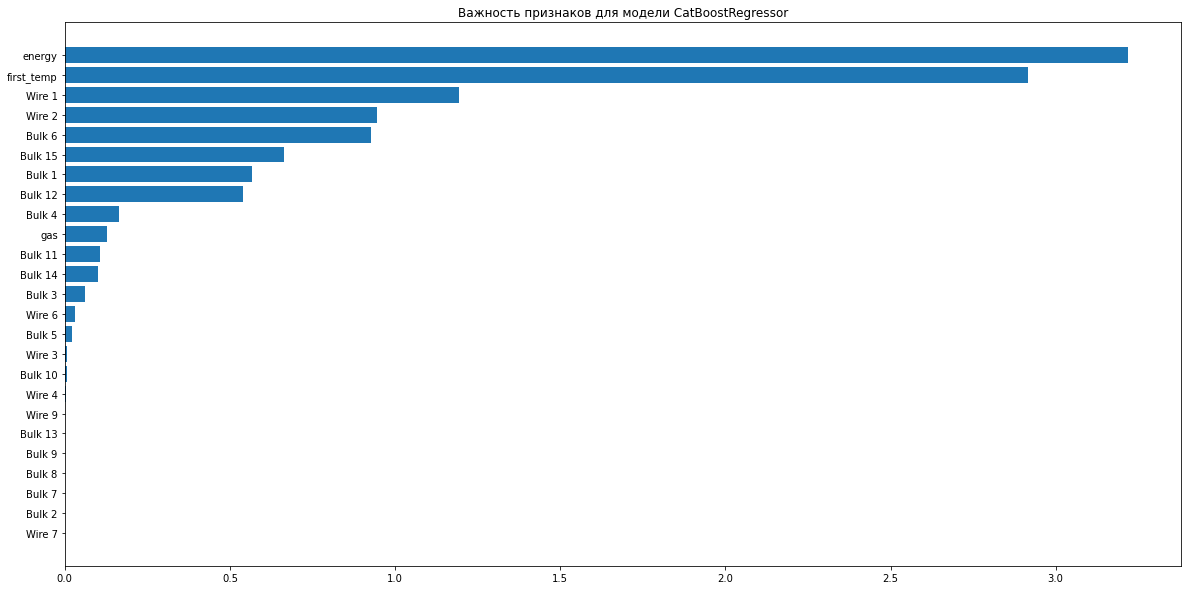

In [61]:
#определим какие признаки наиболее важны для модели CatBoostRegressor

explainer = shap.Explainer(model_cb.best_estimator_)
shap_values = explainer(features_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(20, 10))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Важность признаков для модели CatBoostRegressor')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Проанализировав график выше, можно заметить, что наибольшее влияние на результат модели CatBoostRegressor оказывают такие признаки как: "energy" - суммарная работа по партии, "first_temp" - первая замеренная температура партии. Остальные признаки оказывают свое влияние на качество модели значительно слабее.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта")

<div class="alert alert-info">
<b>Вывод:</b>
<br>
- В данной главе мы подготовили данные для моделирования, а также построили несколько моделей машинного обучения с различными гиперпараметрами для определения температуры стали.
    <br>
- Определили лучшую модель машинного обучения, а также определили какие признаки оказывают наибольшее влияние на нашу модель. Результат метрики МАЕ на тесте получился равным 6.25, что соответствует заявленным требованиям заказчика.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Ильдар, однозначно сильная работа!!!<br>
Обработка данных, размышления над факторами, многогранная интересная модельная работа!!!!, конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> 
 
Технически - добротная работа. <br>
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
<font color='green'>

В общем-то, вопросов у меня и нет особых)<br>
Возможно, что у тебя остались/появились?

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Интересное размышление о обработке именно "выпадающих" значений признаков. Я тоже работаю в промышленности, в нефтегазовой сфере. Думаю данное наблюдение будет полезно при прогнозировании необходимых величин.
    <br>
Николай, спасибо за проверку и интересные рассуждения, вопросов по проекту не осталось. А те, которые были, уже раскрыты на консультации, либо в слаке)
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
ОК, Ильдар, принято. Интересная у тебя работа, многое можно попробовать.<br>
СПАСИБО за отклик, за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>  
    
Тогда впереди только отчёт: нужно описать краткио достижения проекта (модель, параметры, метрика, факторы...). Идея такая: тот, кто прочитает отчёт - сможет сразу реализовать модель, без исследований. Плюс ответы на вопросы из ноушена:<br>
    
"В отчёте ответьте на вопросы:<br>
- Какие пункты плана были выполнены, а какие — нет (поясните почему)?<br>
- Какие трудности возникли и как вы их преодолели?<br>
- Какие ключевые шаги в решении задачи выделили?<br>
- Какая ваша итоговая модель и какое у неё качество?<br>

# Отчет о проделанной работе

 <b>Цель проекта:</b><br>
 
Целью данного проекта являлось получение предсказания температуры плавки стали.

<br>
<b>Какие ключевые шаги в решении задачи выделили?:</b><br>

- для начала была проведена работа с исходными датафреймами: замена типов данных, обработка пропусков;
- далее с помощью описательной статистики была опредена адекватность исходных данных, рассмотрены выбросы и аномалии в данных;
- далее мы погрузились в технологический процесс и поняли по какому признаку мы сможем сгруппировать наши данные и какой признак будет являться целевым в нашем проекте, группировали данные по номеру партии, а целевым признаком была последняя измеренная температуа партии;
- далее признаки были исследованы на мультиколлинеарность, признаки с высокой корреляцией были удалены (удалены признаки "Wire 8" ввиду сильной коллинеарности с признаком "Bulk 9", а также "Wire 5" ввиду малого количества значений;
- далее был сформирован единый датафрейм с признаками;
- после этого мы выделили целевой признак, а общий датафрейм разделили на тренировочную и тестовую выборку;
- далее перешли к поиску наилучшей модели, рассмотрели такие модели машинного обучения как случайный лес, CatBoostRegressor, LightGBMRegressor и XGBoostRegressor.
- определили наилучшую модель, затем протестировали данную модель на тестовой выборке и получили вменяемую величину метрики МАЕ.

<b>Какая ваша итоговая модель и какое у неё качество?:</b><br>

В результате обучения ряда моделей наилучший результат показал CatBoostRegressor. С помощью инструмента GridSearchCV были определены лучшие параметры модели: 
- глубина решающего дерева - 'depth': 5, <br>


- функция потерь - 'loss_function': 'MAE
<br>

- количество решающих деревьев - 'n_estimators': 150. <br>

Остальные параметры использовались по умолчанию. Метрика МАЕ на тренировочной выборке составила 6.19, а время предсказания 25.4 секунды, а на тестовой выбрке метрика МАЕ составила 6.25, а время предсказания 8.99 милисекунды. Как можно заметить, лучшие гиперпараметры являются последними в последовательности значений гиперпараметров, что говорит нам о том, что можно было бы продолжить увеличивать данные списки новыми значениями. Но не стоит забывать и про время обучения модели. Т.к. были достигнуты целевые показатели, выбор данных гиперпараметров является оптимальным. <br>
Наибольшее влияние на результат модели CatBoostRegressor оказывают такие признаки как: "energy" - суммарная работа по партии, "first_temp" - первая замеренная температура партии. Остальные признаки оказывают свое влияние на качество модели значительно слабее.

<b>Какие пункты плана были выполнены, а какие — нет (поясните почему)?:</b><br>

Все разработанные пукнты плана были выполнены.

<b>Какие трудности возникли и как вы их преодолели?:</b><br>

На начальных этапах реализации проекта возникли трудности с понимаем технологического процесса и целевой величины, которую необходимо будет предсказать. Данные трудности были решены с помощью консультаций с тимлидом, а также ответов на вопросы в слаке, помимо этого помогали с рассуждениями и одногруппники.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Привет Ильдар!<br>
Поздравляю с получением диплома о новой специальности!!!!<br>    
С отчётом - ОК. Всё чётко и понятно, как и надо. Единственное - надо также добавлять набор факторов, которые остались/участвуют в модели. Как и писал: тот, кто возьмёт отчёт - просто и легко реализует написанное в нём. (а сейчас факторов и нет)<br>
    
Мноое обсудили. Но добавлю вот что ещё: изучение бизнес-процессов заказчика - очень важный этап, который может вызывать сложности. Но без этого в нашей работе не обойтись. Можно сказать - вскрывать особенности процессов заказчика - часть нашей работы. Ведь замоделировать можно только то, что понимаешь).<br>

Далее скажу, что стараюсь говорить всем на финале.<br>
Пройден большой путь. Со своими коcогорами и равнинами, медианами и дисперсиями)<br>
Умение аналитически мыслить, писать красивый код, эффективно автоматизировать расчёты, видеть задачи бизнеса через призму моделирования - вот то основное, что  останется у тебя важного после нашей школы. А дальше - только взращивать посеянные зёрна и укреплять свои скилы.<br><br>
Если говорить о развитии дополнительных компетенций, рекомендовал бы ещё глянуть такие области знаний:<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)"<br>
4) Ещё важный навык: перевод результататов моделирования на язык бизнеса. Т.е. понимание, как целевые показатели моделей влияют на финансовую выгоду заказчика.<br>
5) Если говорить о модельных рекоммендациях, то есть ещё такие способы как блендинг и стакинг разных моделей.<br><br>

Спасибо!<br>
И УСПЕХОВ)